In [2]:
df = pd.read_csv('Preprocessed_02.csv', index_col='Customer_No')

In [3]:
X = df.drop('Target_Flag', axis = 1)
y = df['Target_Flag']

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=100)

In [5]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [6]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [22]:
rf = RandomForestClassifier(random_state=100)
model = rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
y_proba = rf.predict_proba(X_test)




In [27]:

custom_threshold = 0.1
y_custom_pred = (y_proba >= custom_threshold).astype(int)

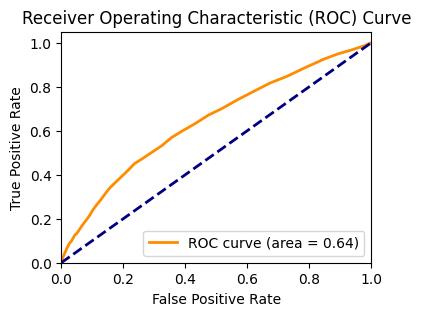

In [23]:
get_roc_auc(y_test, y_proba[:,1])

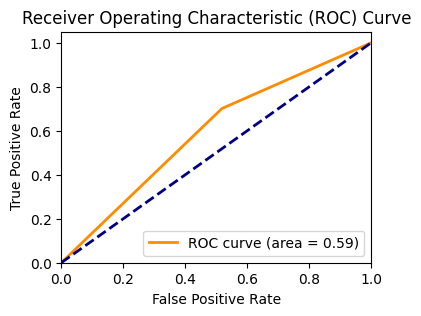

In [28]:
get_roc_auc(y_test, y_custom_pred[:,1])

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [30]:
best_params = grid_search.best_params_


In [31]:
best_params

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [32]:
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='auto', random_state=42)

In [33]:
y_proba = best_rf_classifier.predict_proba(X_test)

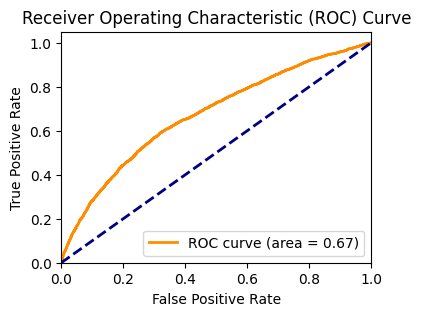

In [35]:
get_roc_auc(y_test, y_proba[:,1])

In [38]:
feature = pd.DataFrame(best_rf_classifier.feature_importances_, X_train.columns)

In [41]:
feature.sort_values(0, ascending=False)

,0
Max_DPD_L3m,0.278715
Max_Loan_Balance_Others,0.105363
Max_Utilization,0.087682
Age,0.071002
Perc_Paymode_Online,0.066465
N_WorkEx_Yr,0.065116
Perc_Repay_Fail,0.063709
N_Enq_L9m,0.052555
N_Family_Member,0.048758
Perc_Paymode_Cheq_Fail,0.044726
